In [2]:
import matplotlib.pyplot as m
import numpy as n
import pandas as p


age = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 26, 32, 37, 42, 47, 52, 58, 63, 67, 72]
bp = [110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
col = [160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270]
y = [10, 15, 25, 35, 45, 55, 65, 70, 80, 90, 12, 20, 30, 40, 50, 60, 70, 85, 95, 98]
age = n.array(age)
bp = n.array(bp)
col = n.array(col)
y = n.array(y)


print(len(age))
print(len(bp))
print(len(col))
print(len(y))

20
20
20
20


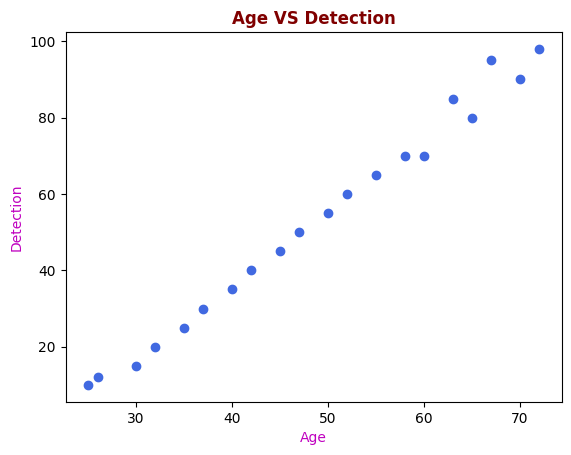

In [3]:
m.scatter(age,y,color="royalblue")
m.xlabel("Age",color='m')
m.ylabel("Detection",color='m')
m.title("Age VS Detection",weight='bold',color='maroon')
m.show()

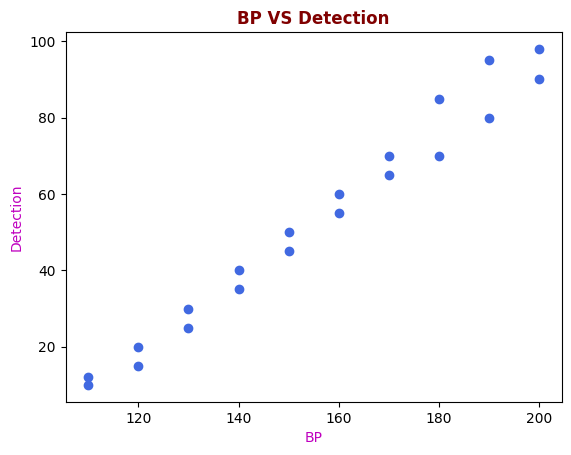

In [4]:
m.scatter(bp,y,color="royalblue")
m.xlabel("BP",color='m')
m.ylabel("Detection",color='m')
m.title("BP VS Detection",weight='bold',color='maroon')
m.show()

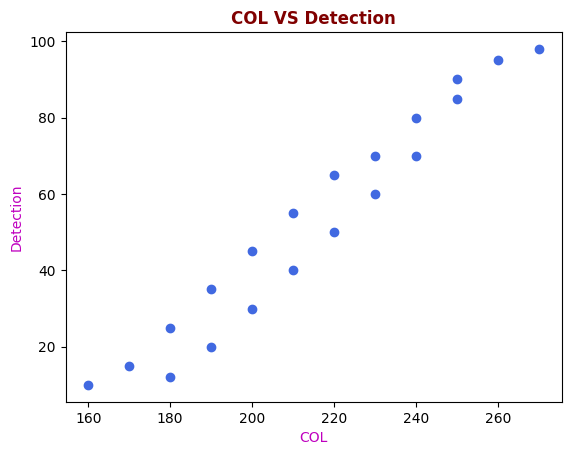

In [5]:
m.scatter(col,y,color="royalblue")
m.xlabel("COL",color='m')
m.ylabel("Detection",color='m')
m.title("COL VS Detection",weight='bold',color='maroon')
m.show()

In [34]:
w1=0
w2=0
w3=0
b=0
lr=0.0001

In [21]:
def predict(x1,x2,x3,w1,w2,w3,b):
  return (x1*w1 + x2*w2 + x3*w3 +b)

def cost_func(x1,x2,x3,w1,w2,w3,b,y):
  y2=predict(x1,x2,x3,w1,w2,w3,b)
  mse=(y2-y)**2
  return n.mean(mse)


In [22]:
print(cost_func(age,bp,col,w1,w2,w3,b,y))



3537.4


In [30]:
def update(age,col,bp,y,w1,w2,w3,b,lr):
  dLdW=n.mean(-2*age*(y-predict(age,bp,col,w1,w2,w3,b)))
  dLdW2=n.mean(-2*bp*(y-predict(age,bp,col,w1,w2,w3,b)))
  dLdW3=n.mean(-2*col*(y-predict(age,bp,col,w1,w2,w3,b)))
  dLdb=n.mean(-2*(y-predict(age,bp,col,w1,w2,w3,b)))

  w1=w1-lr*dLdW
  w2=w2-lr*dLdW2
  w3=w3-lr*dLdW3
  b=b-lr*dLdb
  return w1,w2,w3,b

In [29]:
update(age,col,bp,y,w1,w2,w3,b,lr)

(59.073, 178.62, 242.32, 1.05)

In [32]:
def train(age,bp,col,y,w1,w2,w3,b,lr,tol=1e-13,n_epochs=100, verbose=False):
  weights1=[w1]
  weights2=[w2]
  weights3=[w3]
  biases=[b]
  costs=[]

  ct=1
  while True:
    cost=cost_func(age,bp,col,w1,w2,w3,b,y)
    costs.append(cost)
    if len(costs)>1 and abs(costs[-2]-costs[-1]) < tol:
      break

    w1,w2,w3,b=update(age,bp,col,y,w1,w2,w3,b,lr)
    print(w1," ",ct)
    weights1.append(w1)
    weights2.append(w2)
    weights3.append(w3)
    biases.append(b)

    #if verbose and ct %   n_epochs ==0:
      #print("After ",ct," :- W1= ",w1," b= ",b," cost= ",cost)
    ct+=1

  return weights1,weights2,weights3,biases,costs



In [36]:
w1,w2,w3,b,c=train(age,bp,col,y,w1,w2,w3,b,lr,verbose=True)

0.5907300000000001   1
-7.225197307099999   2
101.71239003437826   3
-1410.9514432080198   4
19598.870934028626   5
-272207.10608147254   6
3780699.186536937   7
-52510292.66159585   8
729317747.6460602   9
-10129525990.139875   10
140689428110.2733   11
-1954041600824.0134   12
27139768986533.773   13
-376945434698867.8   14
5235411576672656.0   15
-7.271485964289454e+16   16
1.0099398558166982e+18   17
-1.4027098688991584e+19   18
1.948229852475698e+20   19
-2.705904936033745e+21   20
3.758243162914021e+22   21
-5.2198403142326245e+23   22
7.249858969998601e+24   23
-1.0069360731506624e+26   24
1.3985379020583516e+27   25
-1.9424353895414797e+28   26
2.697856981201599e+29   27
-3.7470653233600247e+30   28
5.204315364142716e+31   29
-7.22829629913275e+32   30
1.0039412243931695e+34   31
-1.3943783435620695e+35   32
1.93665816061107e+36   33
-2.689832962752477e+37   34
3.735920729152769e+38   35
-5.188836588659841e+39   36
7.206797760379922e+40   37
-1.0009552829728145e+42   38
1.39023

<ipython-input-21-3ba2350317ab>:6: RuntimeWarning: overflow encountered in square
  mse=(y2-y)**2
<ipython-input-32-0e376359ab33>:12: RuntimeWarning: invalid value encountered in scalar subtract
  if len(costs)>1 and abs(costs[-2]-costs[-1]) < tol:
<ipython-input-30-bc4e5cf179c5>:8: RuntimeWarning: invalid value encountered in scalar subtract
  w2=w2-lr*dLdW2
<ipython-input-30-bc4e5cf179c5>:9: RuntimeWarning: invalid value encountered in scalar subtract
  w3=w3-lr*dLdW3


Streaming output truncated to the last 5000 lines.
nan   2860
nan   2861
nan   2862
nan   2863
nan   2864
nan   2865
nan   2866
nan   2867
nan   2868
nan   2869
nan   2870
nan   2871
nan   2872
nan   2873
nan   2874
nan   2875
nan   2876
nan   2877
nan   2878
nan   2879
nan   2880
nan   2881
nan   2882
nan   2883
nan   2884
nan   2885
nan   2886
nan   2887
nan   2888
nan   2889
nan   2890
nan   2891
nan   2892
nan   2893
nan   2894
nan   2895
nan   2896
nan   2897
nan   2898
nan   2899
nan   2900
nan   2901
nan   2902
nan   2903
nan   2904
nan   2905
nan   2906
nan   2907
nan   2908
nan   2909
nan   2910
nan   2911
nan   2912
nan   2913
nan   2914
nan   2915
nan   2916
nan   2917
nan   2918
nan   2919
nan   2920
nan   2921
nan   2922
nan   2923
nan   2924
nan   2925
nan   2926
nan   2927
nan   2928
nan   2929
nan   2930
nan   2931
nan   2932
nan   2933
nan   2934
nan   2935
nan   2936
nan   2937
nan   2938
nan   2939
nan   2940
nan   2941
nan   2942
nan   2943
nan   2944
nan   2945
nan

KeyboardInterrupt: 